# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    #Capitalize city name
    cap_city = city.title()
    
    # If the city is unique, then add it to a our cities list
    if cap_city not in cities:
        cities.append(cap_city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)


Number of cities in the list: 596
['La Passe', 'Tiksi', 'Ushuaia', 'Winnemucca', 'Olyokminsk', 'Margate', 'Kingston', 'Puerto Natales', 'Atafu Village', 'Petropavlovsk-Kamchatsky', 'Longyearbyen', 'Grytviken', 'Edinburgh Of The Seven Seas', 'Kasane', 'Ribeira Grande', 'San Ignacio De Velasco', 'Miguel Auza', 'Hermanus', 'Palamos', 'Bethel', 'Qamdo', 'Port-Aux-Francais', 'Freeport', 'Waitangi', 'Vryburg', 'Bredasdorp', 'Skutskar', 'Lompoc', 'Nema', 'Ntoum', 'Fort St. John', 'Smithers', 'Bartica', 'Ghanzi', 'Albany', 'Papatowai', 'Khandyga', 'Blackmans Bay', 'Puerto Ayora', 'West Island', 'Lihue', 'Birzai', 'Taiohae', 'Port Elizabeth', 'Paradip Garh', 'Samana', 'Gunnedah', 'Chilecito', 'East London', 'Broken Hill', 'Tazovsky', 'Thief River Falls', 'Walvis Bay', 'Hithadhoo', 'Kembe', 'San Patricio', 'Punta Arenas', 'Puerto Maldonado', 'Kayangel', 'Margaret River', 'Rahimah', 'Chifeng', 'Laojunmiao', 'Ba', 'Dwarka', 'Hawaiian Paradise Park', 'Yangor', 'Villa Hernandarias', 'Dayapar', 'Maga

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | La Passe
Processing Record 2 of Set 1 | Tiksi
Processing Record 3 of Set 1 | Ushuaia
Processing Record 4 of Set 1 | Winnemucca
Processing Record 5 of Set 1 | Olyokminsk
Processing Record 6 of Set 1 | Margate
Processing Record 7 of Set 1 | Kingston
Processing Record 8 of Set 1 | Puerto Natales
Processing Record 9 of Set 1 | Atafu Village
Processing Record 10 of Set 1 | Petropavlovsk-Kamchatsky
Processing Record 11 of Set 1 | Longyearbyen
Processing Record 12 of Set 1 | Grytviken
Processing Record 13 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 14 of Set 1 | Kasane
Processing Record 15 of Set 1 | Ribeira Grande
Processing Record 16 of Set 1 | San Ignacio De Velasco
Processing Record 17 of Set 1 | Miguel Auza
Processing Record 18 of Set 1 | Hermanus
Processing Record 19 of Set 1 | Palamos
Processing Record 20 of Set 1 | Bethel
Processing Record 21 of Set 1 | Qamdo
Processing Record 22 of

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Passe,45.5549,-0.8967,17.21,83,97,6.60,FR,1691108159
1,Tiksi,71.6872,128.8694,3.23,97,100,2.87,RU,1691108159
2,Ushuaia,-54.8000,-68.3000,-0.19,100,100,3.60,AR,1691108159
3,Winnemucca,40.9730,-117.7357,29.03,24,75,6.17,US,1691108159
4,Olyokminsk,60.3736,120.4264,22.38,43,3,1.96,RU,1691108159


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,La Passe,45.5549,-0.8967,17.21,83,97,6.60,FR,1691108159
1,Tiksi,71.6872,128.8694,3.23,97,100,2.87,RU,1691108159
2,Ushuaia,-54.8000,-68.3000,-0.19,100,100,3.60,AR,1691108159
3,Winnemucca,40.9730,-117.7357,29.03,24,75,6.17,US,1691108159
4,Olyokminsk,60.3736,120.4264,22.38,43,3,1.96,RU,1691108159


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

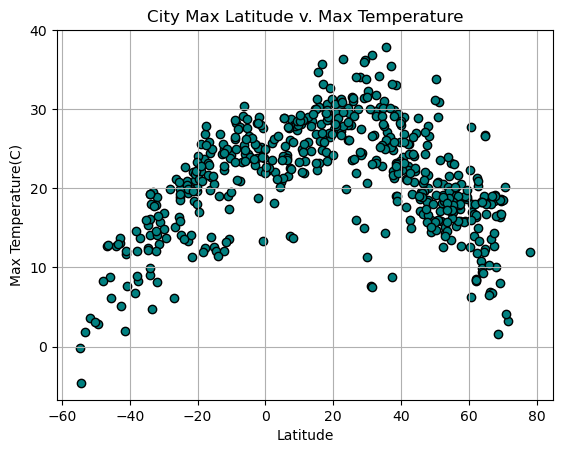

In [145]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x, y, c="teal", edgecolor="black")
plt.title("City Max Latitude v. Max Temperature")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

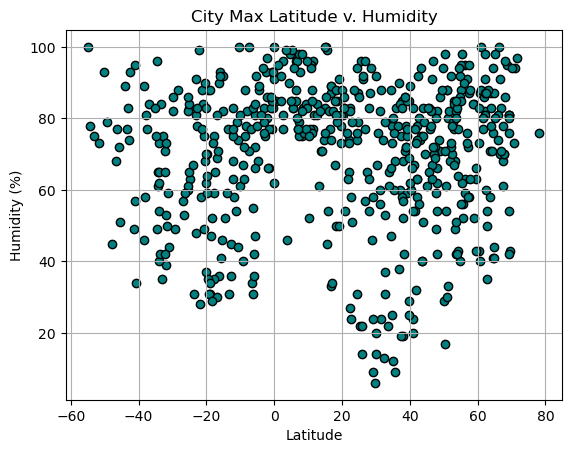

In [146]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x, y, c="teal", edgecolor="black")
plt.title("City Max Latitude v. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

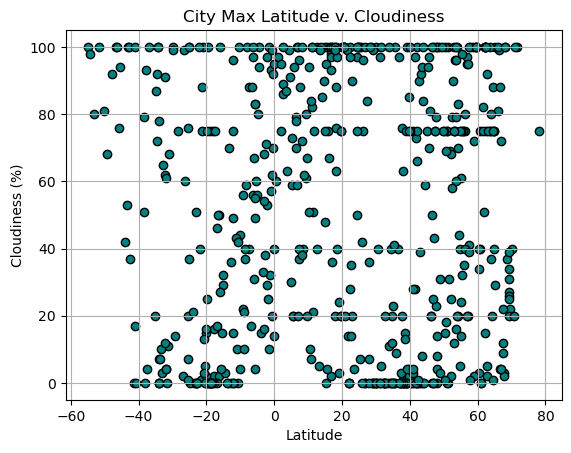

In [147]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x, y, c="teal", edgecolor="black")
plt.title("City Max Latitude v. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

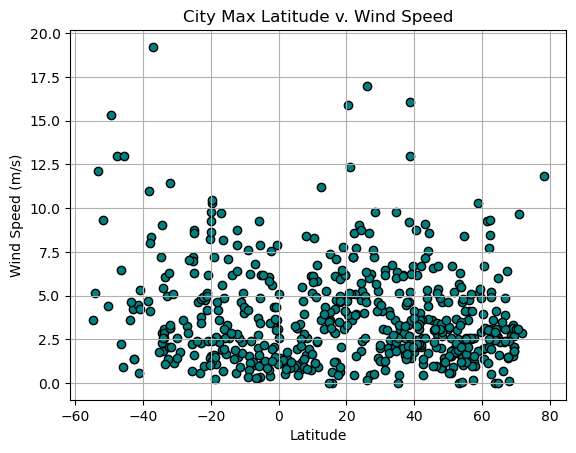

In [148]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x, y, c="teal", edgecolor="black")
plt.title("City Max Latitude v. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [149]:
# Define a function to create Linear Regression plots
def regressions(xvalues, yvalues):

    slope, intercept, rvalue, pvalue, stderr = linregress(xvalues, yvalues)
    
    regress = xvalues * slope + intercept

    north_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    south_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xvalues, yvalues, c="teal", edgecolor="black")

    plt.plot(xvalues, regress, color="red")
    plt.annotate(north_line, (5.8, 10.8), fontsize=15, color="red")
    plt.annotate(south_line, (-50.2, 18.5), fontsize=15, color="red")

    plt.xlabel("Latitude")

    print(f"The R-value is: {rvalue}")

    plt.show()

In [150]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,La Passe,45.5549,-0.8967,17.21,83,97,6.60,FR,1691108159
1,Tiksi,71.6872,128.8694,3.23,97,100,2.87,RU,1691108159
3,Winnemucca,40.9730,-117.7357,29.03,24,75,6.17,US,1691108159
4,Olyokminsk,60.3736,120.4264,22.38,43,3,1.96,RU,1691108159
5,Margate,51.3813,1.3862,17.15,80,100,0.89,GB,1691108160


In [151]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Ushuaia,-54.8000,-68.3000,-0.19,100,100,3.60,AR,1691108159
7,Puerto Natales,-51.7236,-72.4875,3.66,73,100,9.34,CL,1691107885
8,Atafu Village,-8.5421,-172.5159,28.31,75,37,6.22,TK,1691107891
11,Grytviken,-54.2811,-36.5092,-4.61,78,98,5.14,GS,1691108161
12,Edinburgh Of The Seven Seas,-37.0676,-12.3116,13.78,84,100,19.22,SH,1691108161


###  Temperature vs. Latitude Linear Regression Plot

The R-value is: -0.612006666133085


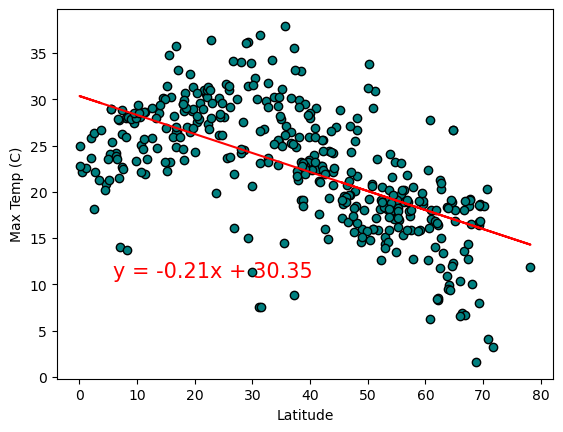

In [152]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

plt.ylabel("Max Temp (C)")
regressions(x, y)

The R-value is: 0.8063763548984136


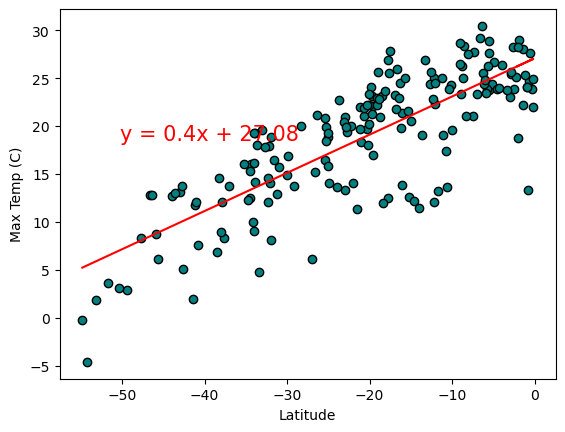

In [153]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

plt.ylabel("Max Temp (C)")
regressions(x, y)

**Discussion about the linear relationship:** Maximum temperature increases drastically toward the equator.

### Humidity vs. Latitude Linear Regression Plot

The R-value is: -0.08830059305825065


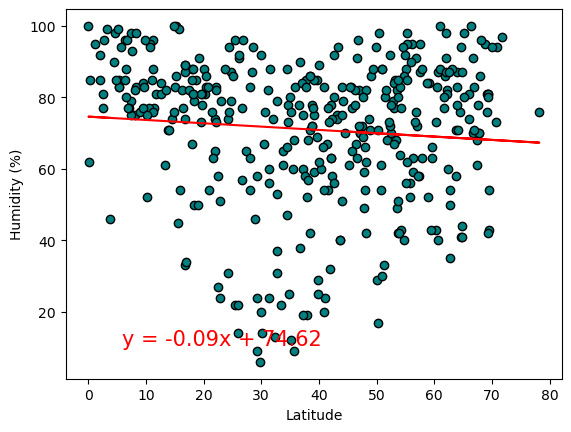

In [154]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

plt.ylabel("Humidity (%)")
regressions(x, y)

The R-value is: 0.08628436266427046


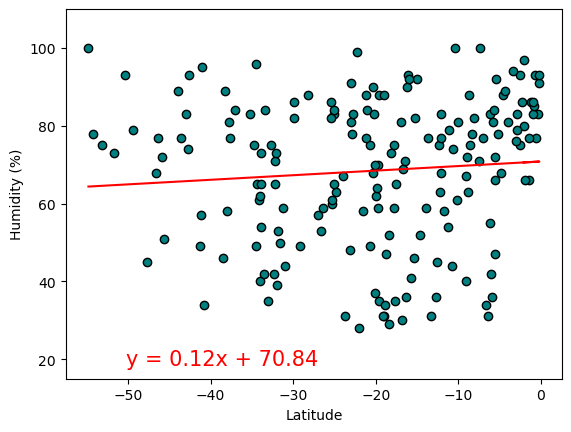

In [155]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

plt.ylim(15, 110)
plt.ylabel("Humidity (%)")
regressions(x, y)

**Discussion about the linear relationship:** Humidity is at a slight rise near the equator, but the data is overall scattered.

### Cloudiness vs. Latitude Linear Regression Plot

The R-value is: -0.09320461254773052


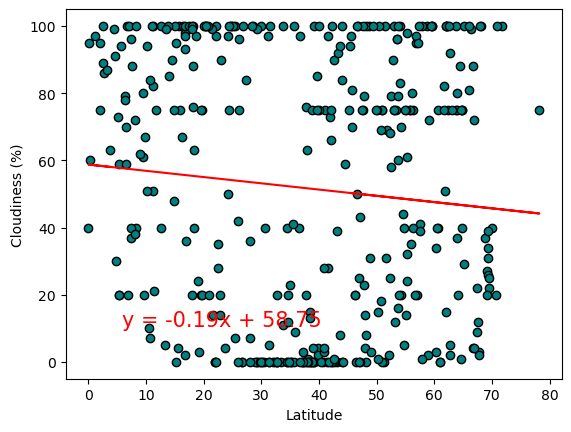

In [156]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness (%)")
regressions(x, y)

The R-value is: -0.1089655050828462


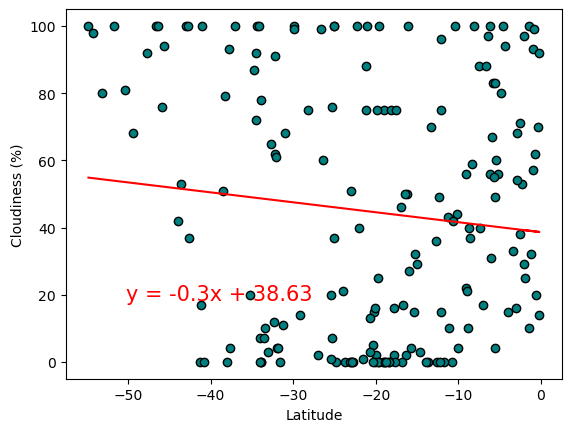

In [157]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness (%)")
regressions(x, y)

**Discussion about the linear relationship:** Cloudiness is random, with a lot more data points on both the high and low spectrum for the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The R-value is: -0.06332040908066355


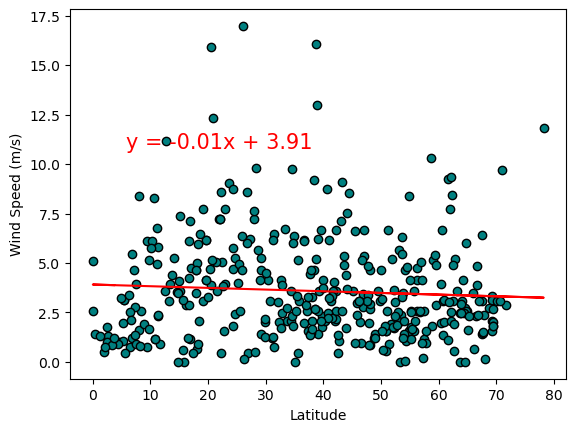

In [158]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed (m/s)")
regressions(x, y)

The R-value is: -0.2754720711493595


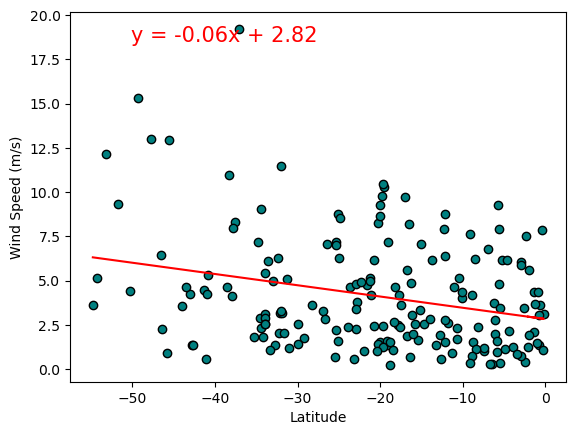

In [159]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed (m/s)")
regressions(x, y)


**Discussion about the linear relationship:** Wind speed has little to no correlation with the hemispheres. 